In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import xarray as xr

In [3]:
data = xr.load_dataset('../../input_data/moce5/moce5_dataset.cdf', decode_timedelta=False)
simu_diusst = np.load('../../output_files/simu_diusst.npy', allow_pickle=True)
simu_slab = np.load('../../output_files/simu_slab.npy', allow_pickle=True)

T_f = float(data.T_f)
ref_idx = 20
time_pts = data['time_day'].to_numpy()[:-1]

dsst_diusst = simu_diusst[0][:,0] - simu_diusst[0][:,ref_idx]
dsst_slab = simu_slab[0] - T_f

print('Reference depth: {:.3f} m'.format(simu_diusst[2][ref_idx]))

Reference depth: -3.045 m


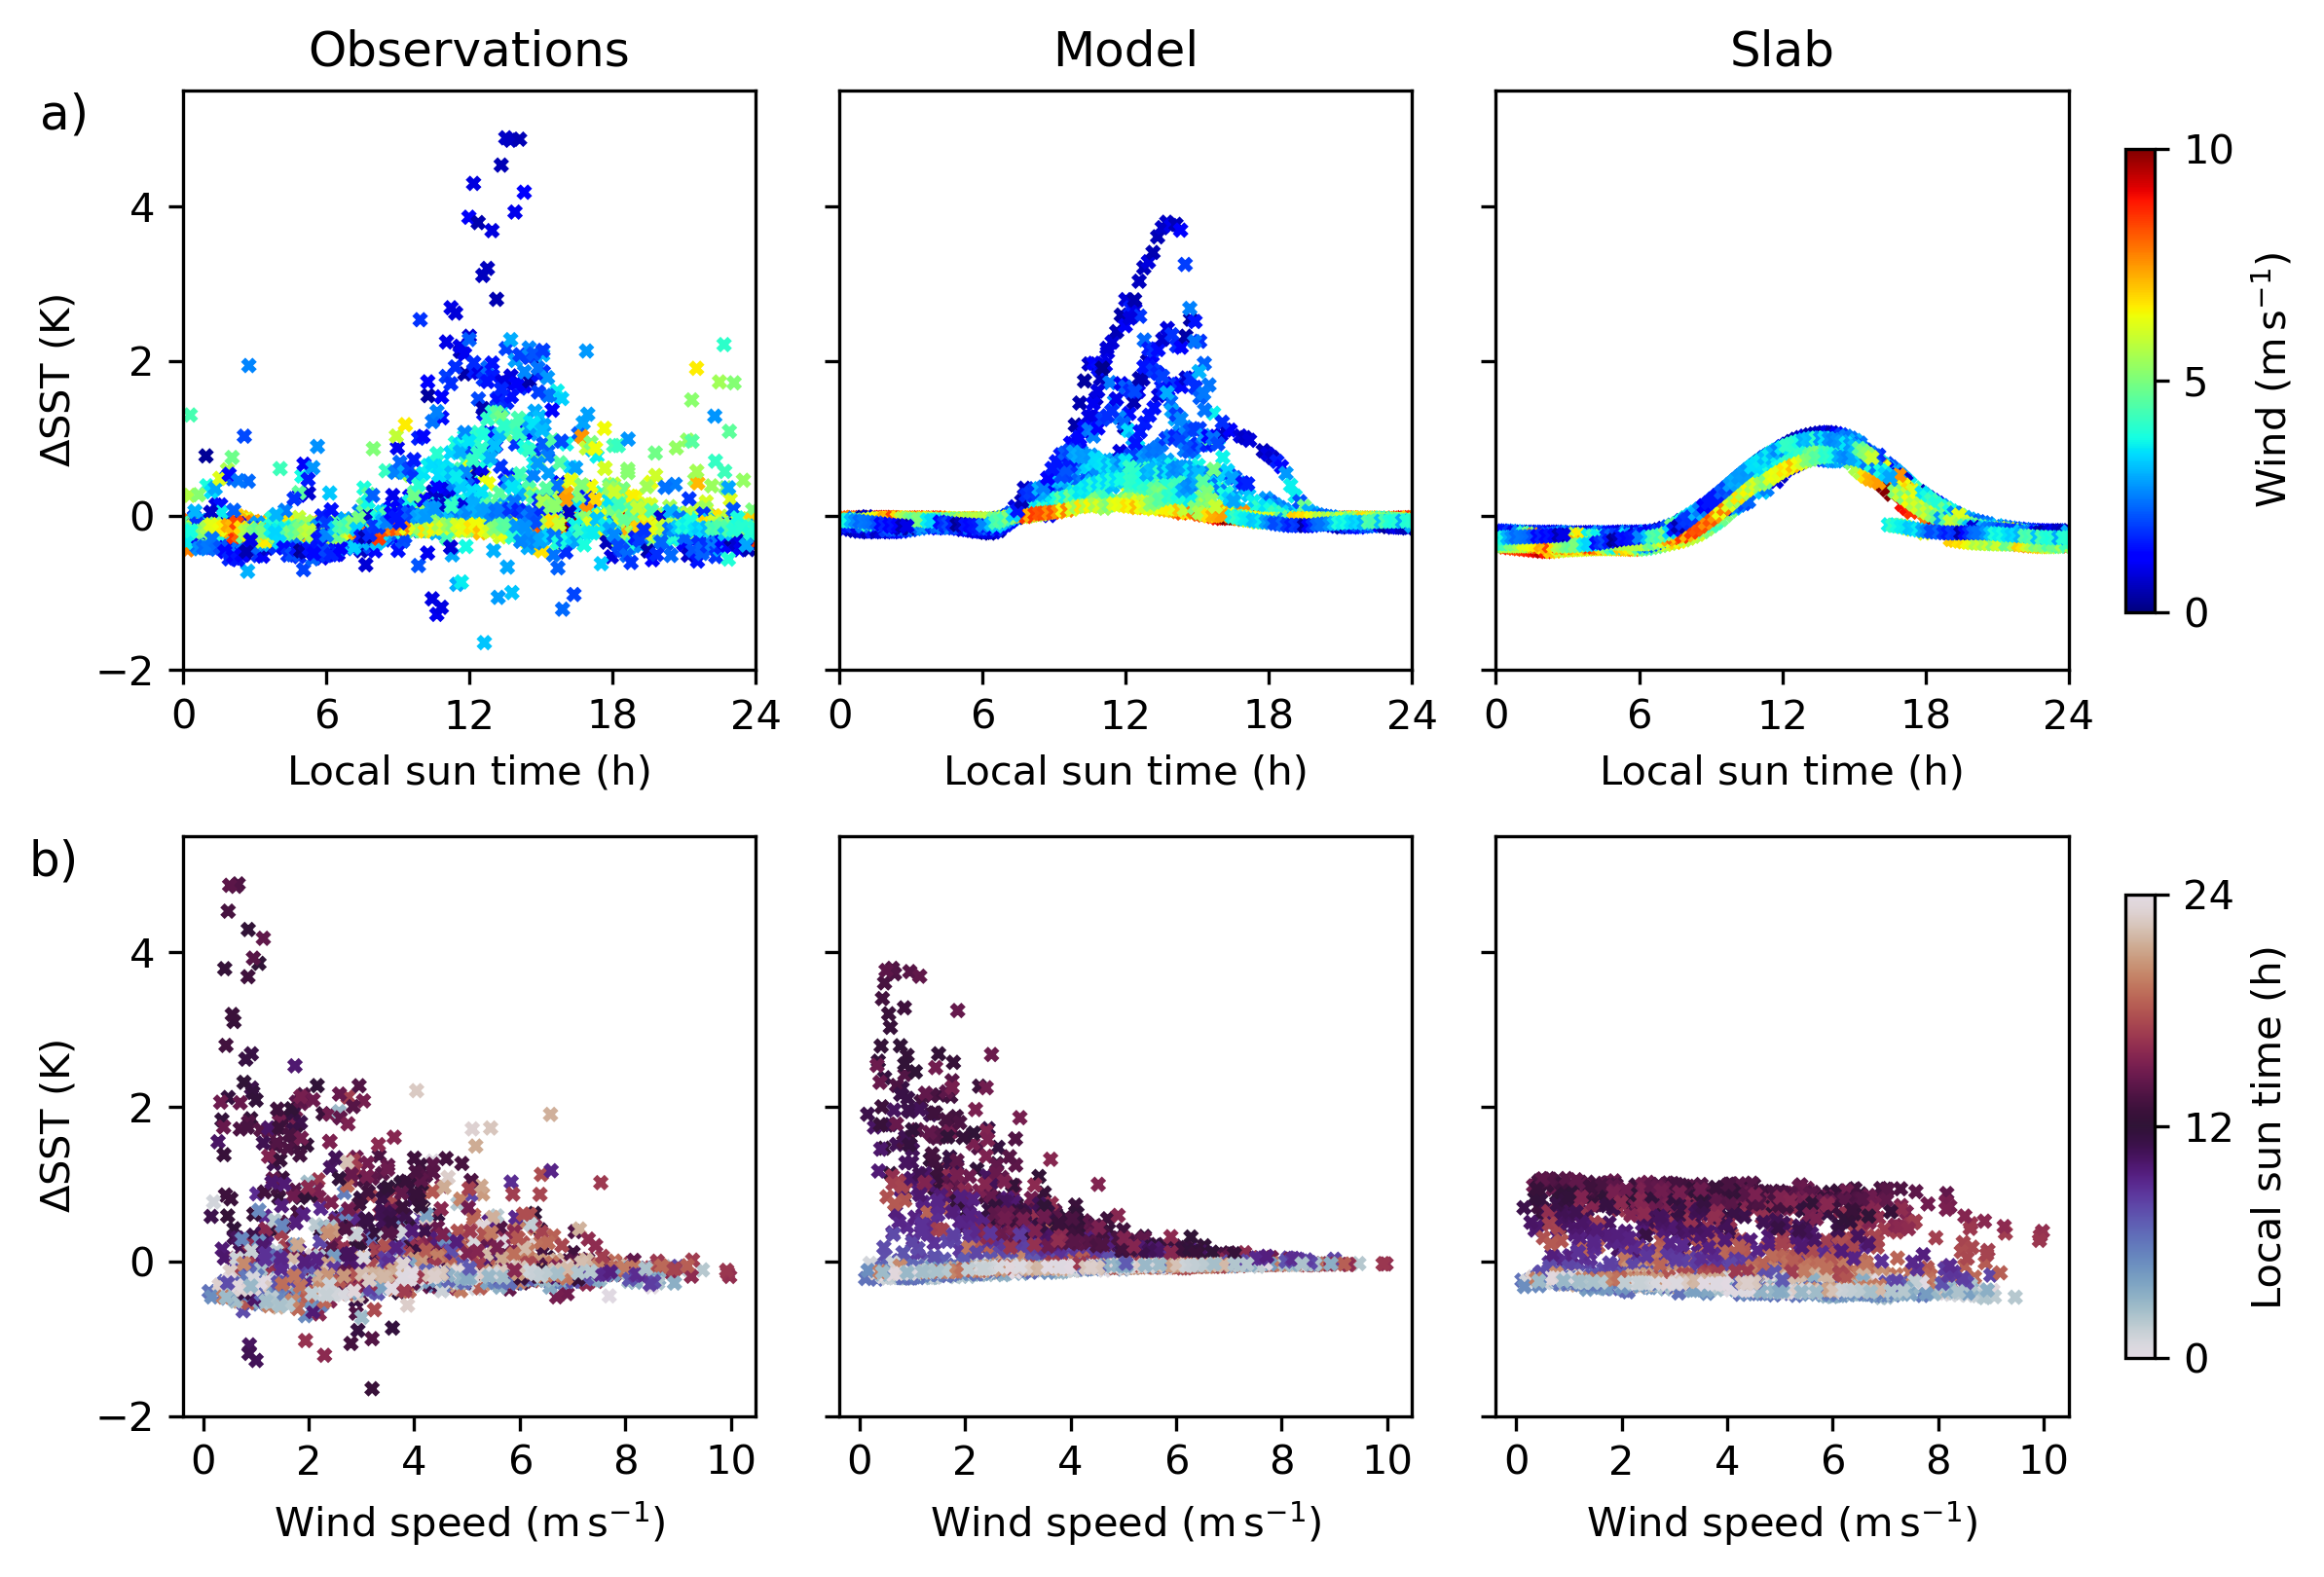

In [9]:
xmin, xmax = -2, 5.5

fig, ax = plt.subplots(2,3,dpi=300,figsize=(8,5.5),sharey=True)

ax[0,0].scatter(time_pts%1 * 24,data['dsst'][:-1],c=data['wind'][:-1],cmap='jet',vmin=0,vmax=10,marker='x',s=8)
ax[0,1].scatter(time_pts%1 * 24,dsst_diusst,c=data['wind'][:-1],cmap='jet',vmin=0,vmax=10,marker='x',s=8)
pltd = ax[0,2].scatter(time_pts%1 * 24,dsst_slab,c=data['wind'][:-1],cmap='jet',vmin=0,vmax=10,marker='x',s=8)

ax[1,0].scatter(data['wind'][:-1],data['dsst'][:-1],  c=time_pts%1 *24,cmap='twilight',vmin=0,vmax=24,marker='x',s=8)
ax[1,1].scatter(data['wind'][:-1],dsst_diusst,  c=time_pts%1 *24,cmap='twilight',vmin=0,vmax=24,marker='x',s=8)
pltw = ax[1,2].scatter(data['wind'][:-1],dsst_slab,c=time_pts%1 *24,cmap='twilight',vmin=0,vmax=24,marker='x',s=8)


for i in range(3):
    ax[0,i].set(ylim=(xmin,xmax),xlim=(0,24),xticks=np.arange(0,25,6))
    ax[0,i].set(xlabel='Local sun time (h)')
    ax[1,i].set(ylim=(xmin,xmax),xticks=np.arange(0,11,2))
    ax[1,i].set(xlabel=r'Wind speed (m$\,$s$^{-1}$)')

ax[0,0].set_ylabel('$\Delta$SST (K)')
ax[1,0].set_ylabel('$\Delta$SST (K)')

ax[0,0].set_title('Observations')
ax[0,1].set_title('Model')
ax[0,2].set_title('Slab')

axin1 = ax[0,2].inset_axes([1.1, 0.1, 0.05, 0.8])
cbar1 = plt.colorbar(pltd,cax=axin1,orientation='vertical',ticks=[0,5,10])
cbar1.ax.tick_params(labelsize=10)
cbar1.set_label(label=r'Wind (m$\,$s$^{-1}$)',size=10)

axin2 = ax[1,2].inset_axes([1.1, 0.1, 0.05, 0.8])
cbar2 = plt.colorbar(pltw,cax=axin2,orientation='vertical',ticks=[0,12,24], label=r'Local sun time (h)')
cbar2.ax.tick_params(labelsize=10)
cbar2.set_label(label=r'Local sun time (h)',size=10)

ax[0,0].text(-6,5,'a)', fontsize=12)
ax[1,0].text(-3.3,5,'b)', fontsize=12)

plt.tight_layout()

plt.show()